In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate a classification dataset

In [2]:
X, y_true = make_blobs(
    n_samples=1000, centers=3, cluster_std=0.60, random_state=0
)

# Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

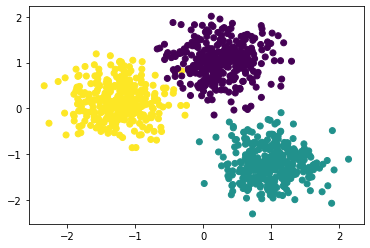

In [4]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true)
plt.show()

# Implemention of KMeans

In [5]:
def update_centroid(centroid, X):
    dist = []
    for c in centroid:
        dist.append(np.sum(np.square(X - c), axis=1))
    dist=np.array(dist)
    pred=np.argmin(dist.T, axis=1)
    
    new_centroid = []
    for i in np.unique(pred):
        new_centroid.append(X[pred == i].mean(axis=0)) 
    new_centroid = np.array(new_centroid)
    return new_centroid


In [6]:
class KMeans():
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
    
    def fit_transform(self, X):
        centroid_ = np.random.randn(self.n_clusters, X.shape[1])
        self.centroid = update_centroid(centroid_, X)
        self.X = X

        while np.sum(self.centroid != centroid_) !=0:
            centroid_ = self.centroid
            self.centroid = update_centroid(centroid_, X)
        dist = []
        for c in self.centroid:
            dist.append(np.sum(np.square(X - c), axis=1))
        dist=np.array(dist)
        self.pred=np.argmin(dist.T, axis=1)     
        return self.pred
    
    def SSE(self):
        sse = 0
        for i in range(len(self.centroid)):
            sse += np.sum(np.square(self.X[self.pred == i] - self.centroid[i]))
        return sse

# Choose best K using elbow method

In [7]:
K = np.arange(1, 10)
SSE = []
for k in K:
    km = KMeans(n_clusters=k)
    pred = km.fit_transform(X_scaled)
    SSE.append(km.SSE())

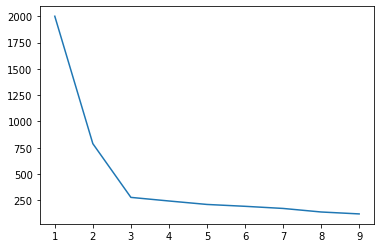

In [8]:
plt.plot(K, SSE)
plt.show()

# The best K is 3

In [9]:
km = KMeans(n_clusters=3)
pred= km.fit_transform(X_scaled)

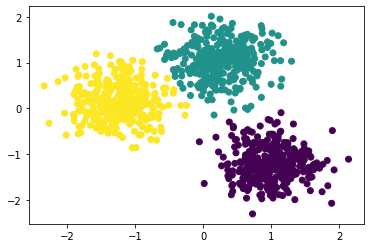

In [10]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=pred)
plt.show()